In [1]:
using LinearAlgebra
using Random
using Plots
using Printf

Norm des Residuums: ρ = 246.861135


Norm des Residuums: ρ̃ = 465.17

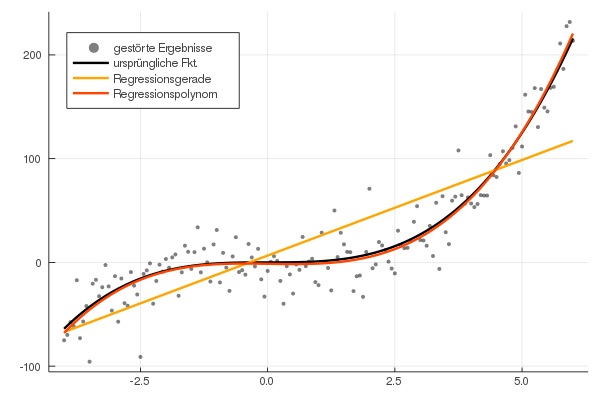

In [2]:
Random.seed!(42)

t = -4:1/16:6
m = length(t)

deg = 3
n = deg+1
f₀(x) = x.^3                 # ursprüngliche Funktion

A = t.^((0:deg)')            # Vandermonde-Matrix
b = f₀(t) + 20*randn(m)      # gestörte "Messergebnisse"
scatter(t, b, m=(3,0.5,:black,stroke(0)),
        lab="gestörte Ergebnisse", legend=:topleft)

# Lösung des Ausgleichsproblems mit Orthogonalisierung der Designmatrix

R = qr([A b]).R
k = R[1:n,1:n]\R[1:n,n+1]
ρ = R[n+1,n+1]
@printf "Norm des Residuums: ρ = %f" abs(ρ)
@printf "\n"

R̃ = qr([ones(Int,m) t b]).R
k̃ = R̃[1:2,1:2]\R̃[1:2,3]
ρ̃ = R̃[3,3]
@printf "Norm des Residuums: ρ̃ = %.2f" abs(ρ̃)

f(x) = (k' * x'.^(0:deg))'
f̃(x) = k̃[1] .+ k̃[2]*x
x = -4:(1/64):6
plot!(x, f₀(x), color=:black, width=2, lab="ursprüngliche Fkt.")
plot!(x, f̃(x), color=:orange, width=2, lab="Regressionsgerade")
plot!(x, f(x), color=:orangered, width=2, lab="Regressionspolynom")